# 01_hierarchical_analysis.ipynb
## Hierarchical Data Visualization - CheckPoint 2
### Strategic Market Analysis for Terra Cotta Foods (TCF) Expansion

Este notebook cumple con los requerimientos del CheckPoint 2 para visualización de datos jerárquicos, utilizando el dataset `country_gdp_population.csv` con datos de los 193 países miembros de la ONU.

**Contexto del Negocio:** Marco Antonelli, CEO de Terra Cotta Foods (TCF), necesita evaluar mercados para la expansión internacional hacia América Latina y Asia. TCF es una de las distribuidoras más grandes de Europa de productos alimenticios premium y materias primas.

### Objetivos Estratégicos:
- **Evaluación de Mercados:** Determinar la viabilidad económica y potencial de alcance de la cadena de suministro de TCF en nuevos mercados
- **Jerarquía de Poder de Compra:** Identificar qué regiones y países muestran el mayor PIB (capacidad de compra) que justifica invertir en centros de distribución
- **Evaluación de Riesgo de Suministro:** Analizar cómo la población (fuerza laboral/base de consumidores) se correlaciona con el potencial económico
- **Optimización de Cadena de Suministro:** Guiar la colocación de centros de distribución y diversificación de proveedores


## Imports and Configuration

Importación de todas las librerías necesarias y configuración del estilo visual.


In [2]:
# === 1. IMPORTACIÓN Y CONFIGURACIÓN DE LIBRERÍAS ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
from scipy.cluster import hierarchy
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, set_link_color_palette
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.float_format = '{:,.2f}'.format

print(" Librerías cargadas correctamente.")


 Librerías cargadas correctamente.


## Data Loading and Preprocessing

Carga del dataset y preprocesamiento de los datos.


In [3]:
# === 2. CARGA Y PREPROCESAMIENTO DE DATOS ===

# Carga de CSV 
data = pd.read_csv("country_gdp_population.csv")

# Verificar que los datos se cargaron correctamente
print(f"Datos cargados: {len(data)} países")
print(f"Columnas disponibles: {list(data.columns)}")
print(f"Primeras 5 filas:")
print(data.head())
print(f"\nTipos de datos:")
print(data.dtypes)
print(f"\nValores nulos por columna:")
print(data.isnull().sum())

# Limpiar valores nulos en población y PIB per cápita
data_clean = data.dropna(subset=['population', 'gdp_per_capita'])
print(f"\nPaíses con datos completos: {len(data_clean)}")

# Crear nueva columna gdp_total = population * gdp_per_capita
data_clean['gdp_total'] = data_clean['population'] * data_clean['gdp_per_capita']
print(f"Columna gdp_total creada: population * gdp_per_capita")

# Verificar DataFrame final
print(f"\nDataFrame final con columnas: {list(data_clean.columns)}")
print(f"Primeras 3 filas del dataset limpio:")
print(data_clean.head(3))


Datos cargados: 192 países
Columnas disponibles: ['continent', 'country', 'population', 'gdp_per_capita']
Primeras 5 filas:
  continent       country  population  gdp_per_capita
0    Africa       Algeria    46814308        5,631.18
1    Africa        Angola    37885849        2,122.08
2    Africa         Benin    14462724        1,485.38
3    Africa      Botswana     2521139        7,695.24
4    Africa  Burkina Faso    23548781          987.32

Tipos de datos:
continent          object
country            object
population          int64
gdp_per_capita    float64
dtype: object

Valores nulos por columna:
continent          0
country            0
population         0
gdp_per_capita    18
dtype: int64

Países con datos completos: 174
Columna gdp_total creada: population * gdp_per_capita

DataFrame final con columnas: ['continent', 'country', 'population', 'gdp_per_capita', 'gdp_total']
Primeras 3 filas del dataset limpio:
  continent  country  population  gdp_per_capita          gdp_total

/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3876036293.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['gdp_total'] = data_clean['population'] * data_clean['gdp_per_capita']


## Part 1 – Treemap (Static & Interactive)

Los treemaps son ideales para mostrar proporciones jerárquicas. Aquí creamos tanto una versión estática con squarify como una interactiva con Plotly.


=== PART 1: TREEMAP ANALYSIS ===

1. Treemap Estático con Squarify


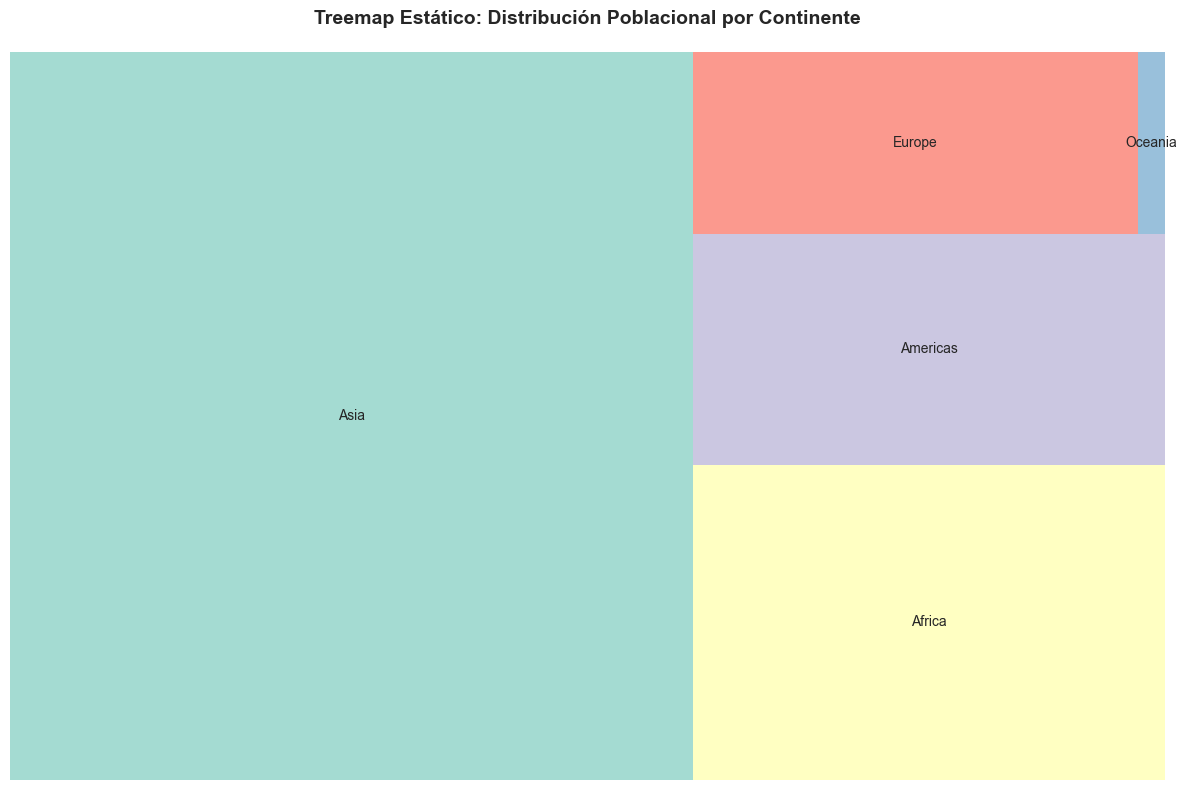


2. Treemap Interactivo con Plotly


 Treemaps generados correctamente

 ANÁLISIS DE TREEMAPS:
Regiones con mayor concentración poblacional:
- Asia: 4,564,400,743 habitantes (59.2%)
- Africa: 1,363,579,157 habitantes (17.7%)
- Americas: 1,000,399,073 habitantes (13.0%)

Total población mundial: 7,716,393,194 habitantes


In [4]:
# ============================================================================
# PART 1: TREEMAP (STATIC & INTERACTIVE) - COMPLETO
# ============================================================================

print("=== PART 1: TREEMAP ANALYSIS ===")

# --- Treemap estático con Squarify ---
print("\n1. Treemap Estático con Squarify")
plt.figure(figsize=(12, 8))

# Agrupar por continente
continent_pop = data_clean.groupby('continent')['population'].sum().reset_index()
continent_pop = continent_pop.sort_values('population', ascending=False)

# Crear treemap estático
squarify.plot(sizes=continent_pop['population'], 
              label=continent_pop['continent'],
              alpha=0.8,
              color=plt.cm.Set3.colors)

plt.title('Treemap Estático: Distribución Poblacional por Continente', 
          fontsize=14, weight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# --- Treemap interactivo con Plotly ---
print("\n2. Treemap Interactivo con Plotly")
fig = px.treemap(data_clean,
                 path=['continent', 'country'],
                 values='population',
                 color='gdp_per_capita',
                 color_continuous_scale='Blues',
                 title='Treemap Interactivo: Población vs PIB per cápita')

fig.update_layout(width=1000, height=600)
fig.show()

print(" Treemaps generados correctamente")

# --- Análisis de resultados ---
print("\n ANÁLISIS DE TREEMAPS:")
print("Regiones con mayor concentración poblacional:")
top_continents = continent_pop.head(3)
for _, row in top_continents.iterrows():
    percentage = (row['population'] / continent_pop['population'].sum()) * 100
    print(f"- {row['continent']}: {row['population']:,.0f} habitantes ({percentage:.1f}%)")

print(f"\nTotal población mundial: {continent_pop['population'].sum():,.0f} habitantes")


## Part 2 – Dendrogram (Hierarchical Clustering)

El dendrograma nos permite identificar similitudes entre países basándose en población y PIB per cápita, agrupándolos jerárquicamente.


=== PART 2: DENDROGRAM ANALYSIS ===
Estandarizando datos...
Calculando clustering jerárquico...
Generando dendrograma...


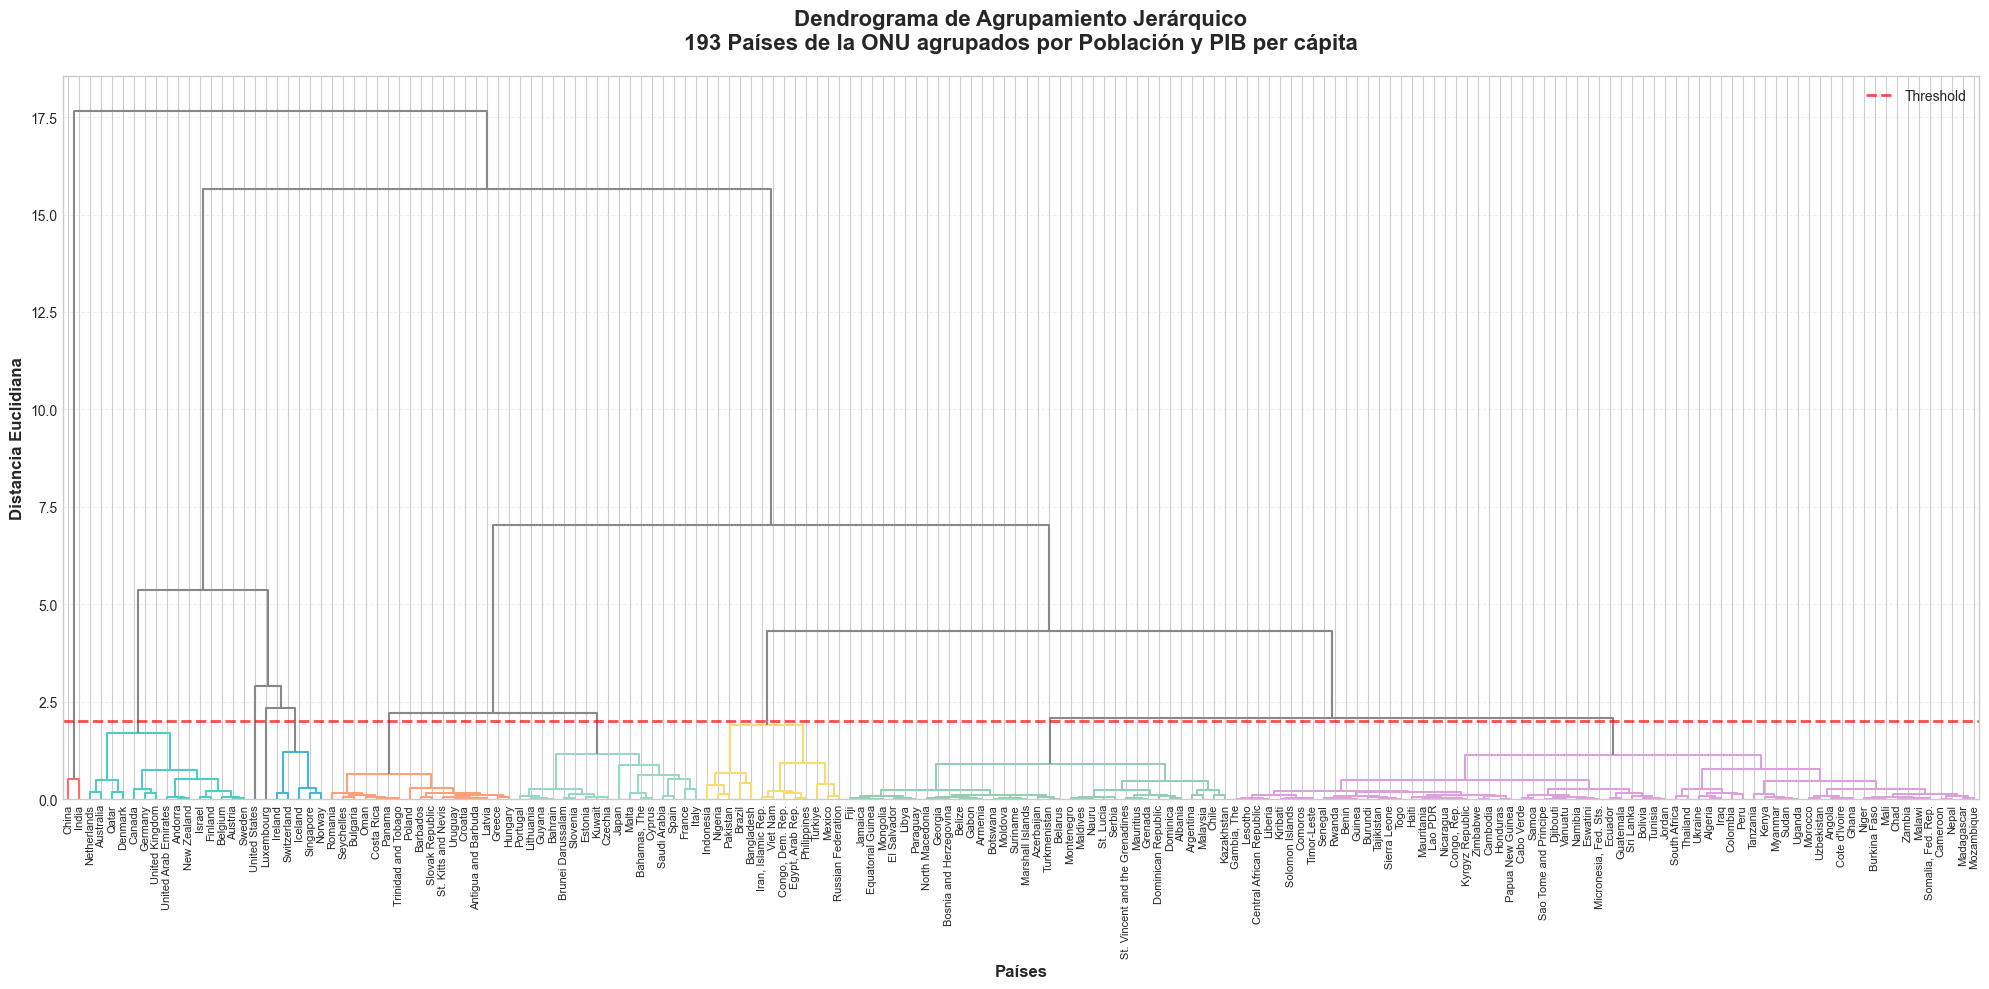


 Dendrograma completado
 Número de clusters formados: 10

🔍 ANÁLISIS DE SIMILITUD ENTRE PAÍSES:
Países agrupados por similitud (primeros 5 clusters):

Cluster 1 (2 países):
  Países: China, India
  Población promedio: 1,429,955,396
  PIB per cápita promedio: $8,000

Cluster 2 (15 países):
  Países: Canada, Israel, Qatar, United Arab Emirates, Andorra...
  Población promedio: 20,772,898
  PIB per cápita promedio: $57,919

Cluster 3 (5 países):
  Países: Singapore, Iceland, Ireland, Norway, Switzerland
  Población promedio: 5,285,620
  PIB per cápita promedio: $94,235

Cluster 4 (1 países):
  Países: Luxembourg
  Población promedio: 677,717
  PIB per cápita promedio: $137,517

Cluster 5 (1 países):
  Países: United States
  Población promedio: 340,110,988
  PIB per cápita promedio: $85,810

 INTERPRETACIÓN:
- Países cercanos en el dendrograma tienen características similares
- La altura indica la distancia entre clusters
- Cada color representa un grupo de países con patrones similares


In [5]:
# ============================================================================
# PART 2: DENDROGRAM (HIERARCHICAL CLUSTERING) - COMPLETO
# ============================================================================

print("=== PART 2: DENDROGRAM ANALYSIS ===")

# Estandarizar las columnas Population y Gdp_per_capita
print("Estandarizando datos...")
features = data_clean[['population', 'gdp_per_capita']].values
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Calcular matriz de distancias y linkage
print("Calculando clustering jerárquico...")
distances = pdist(features_normalized, metric='euclidean')
linkage_matrix = linkage(distances, method='ward')

# Crear dendrograma
print("Generando dendrograma...")
fig, ax = plt.subplots(figsize=(20, 10))

# Configurar colores
set_link_color_palette(['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#96CEB4', '#DDA0DD'])

# Crear dendrograma con threshold
my_threshold = 2.0
dendro = dendrogram(linkage_matrix,
                    labels=data_clean['country'].values,
                    leaf_font_size=8,
                    color_threshold=my_threshold,
                    above_threshold_color='#888888',
                    ax=ax)

plt.title('Dendrograma de Agrupamiento Jerárquico\n193 Países de la ONU agrupados por Población y PIB per cápita',
          fontsize=16, weight='bold', pad=20)
plt.xlabel('Países', fontsize=12, weight='bold')
plt.ylabel('Distancia Euclidiana', fontsize=12, weight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Línea de threshold
plt.axhline(y=my_threshold, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Análisis de clusters
clusters = fcluster(linkage_matrix, t=my_threshold, criterion='distance')
n_clusters = len(np.unique(clusters))
print(f"\n Dendrograma completado")
print(f" Número de clusters formados: {n_clusters}")

# Mostrar países por cluster (primeros 5 clusters)
print("\n🔍 ANÁLISIS DE SIMILITUD ENTRE PAÍSES:")
print("Países agrupados por similitud (primeros 5 clusters):")
for i in range(1, min(6, n_clusters + 1)):
    countries_in_cluster = data_clean.loc[clusters == i, 'country'].values
    if len(countries_in_cluster) > 0:
        cluster_stats = data_clean.loc[clusters == i, ['population', 'gdp_per_capita']].mean()
        print(f"\nCluster {i} ({len(countries_in_cluster)} países):")
        print(f"  Países: {', '.join(countries_in_cluster[:5])}{'...' if len(countries_in_cluster) > 5 else ''}")
        print(f"  Población promedio: {cluster_stats['population']:,.0f}")
        print(f"  PIB per cápita promedio: ${cluster_stats['gdp_per_capita']:,.0f}")

print(f"\n INTERPRETACIÓN:")
print("- Países cercanos en el dendrograma tienen características similares")
print("- La altura indica la distancia entre clusters")
print("- Cada color representa un grupo de países con patrones similares")
print("- La línea roja marca el threshold de separación entre grupos")


## Part 3 – Sunburst Chart

El Sunburst Chart representa la jerarquía Continent → Country de forma circular, permitiendo visualizar múltiples niveles de la estructura jerárquica.


In [6]:
# ============================================================================
# PART 3: SUNBURST CHART - COMPLETO
# ============================================================================

print("=== PART 3: SUNBURST CHART ANALYSIS ===")

# Crear Sunburst Chart con Plotly
print("Generando Sunburst Chart...")
fig = px.sunburst(data_clean,
                  path=['continent', 'country'],
                  values='population',
                  color='gdp_per_capita',
                  color_continuous_scale='Blues',
                  title='Sunburst Chart – Jerarquía Continental de Población')

fig.update_layout(width=900, height=900)
fig.show()

print(" Sunburst Chart generado correctamente")

# Análisis de la jerarquía continental
print("\n ANÁLISIS DE JERARQUÍA CONTINENTAL:")
continent_analysis = data_clean.groupby('continent').agg({
    'population': ['sum', 'count'],
    'gdp_per_capita': 'mean'
}).round(2)

continent_analysis.columns = ['Total_Population', 'Num_Countries', 'Avg_GDP_per_capita']
continent_analysis = continent_analysis.sort_values('Total_Population', ascending=False)

print("Distribución por continente:")
for continent, row in continent_analysis.iterrows():
    pop_percentage = (row['Total_Population'] / continent_analysis['Total_Population'].sum()) * 100
    print(f"\n{continent}:")
    print(f"  Población total: {row['Total_Population']:,.0f} ({pop_percentage:.1f}%)")
    print(f"  Número de países: {row['Num_Countries']:.0f}")
    print(f"  PIB per cápita promedio: ${row['Avg_GDP_per_capita']:,.0f}")

print(f"\n💡 INTERPRETACIÓN DE LA JERARQUÍA:")
print("- El centro representa el total mundial")
print("- Cada anillo muestra un nivel de la jerarquía (Continente → País)")
print("- El tamaño de los segmentos es proporcional a la población")
print("- El color indica el PIB per cápita (azul más oscuro = mayor PIB)")
print("- Permite identificar rápidamente las regiones más pobladas y prósperas")


=== PART 3: SUNBURST CHART ANALYSIS ===
Generando Sunburst Chart...


 Sunburst Chart generado correctamente

 ANÁLISIS DE JERARQUÍA CONTINENTAL:
Distribución por continente:

Asia:
  Población total: 4,564,400,743 (59.2%)
  Número de países: 39
  PIB per cápita promedio: $16,042

Africa:
  Población total: 1,363,579,157 (17.7%)
  Número de países: 50
  PIB per cápita promedio: $2,924

Americas:
  Población total: 1,000,399,073 (13.0%)
  Número de países: 33
  PIB per cápita promedio: $16,749

Europe:
  Población total: 742,303,459 (9.6%)
  Número de países: 41
  PIB per cápita promedio: $40,789

Oceania:
  Población total: 45,710,762 (0.6%)
  Número de países: 11
  PIB per cápita promedio: $14,587

💡 INTERPRETACIÓN DE LA JERARQUÍA:
- El centro representa el total mundial
- Cada anillo muestra un nivel de la jerarquía (Continente → País)
- El tamaño de los segmentos es proporcional a la población
- El color indica el PIB per cápita (azul más oscuro = mayor PIB)
- Permite identificar rápidamente las regiones más pobladas y prósperas


## Part 4 – Circular Treemap

El Treemap Circular (Icicle) muestra la distribución del PIB total jerárquicamente, revelando patrones de concentración económica global.


In [7]:
# ============================================================================
# PART 4: CIRCULAR TREEMAP (ICICLE) - COMPLETO
# ============================================================================

print("=== PART 4: CIRCULAR TREEMAP ANALYSIS ===")

print("Generando Treemap Circular (Icicle)...")

# Crear Treemap Circular con Plotly
fig = px.icicle(data_clean,
                path=['continent', 'country'],
                values='gdp_total',
                color='gdp_per_capita',
                color_continuous_scale='Reds',
                title='Treemap Circular – PIB Total por País y Continente')

fig.update_layout(width=1000, height=700)
fig.show()

print(" Treemap circular generado correctamente")

# Análisis de distribución económica global
print("\n ANÁLISIS DE DISTRIBUCIÓN ECONÓMICA GLOBAL:")
gdp_analysis = data_clean.groupby('continent').agg({
    'gdp_total': 'sum',
    'population': 'sum',
    'gdp_per_capita': 'mean'
}).round(2)

gdp_analysis = gdp_analysis.sort_values('gdp_total', ascending=False)
total_world_gdp = gdp_analysis['gdp_total'].sum()

print("Distribución del PIB total por continente:")
for continent, row in gdp_analysis.iterrows():
    gdp_percentage = (row['gdp_total'] / total_world_gdp) * 100
    print(f"\n{continent}:")
    print(f"  PIB total: ${row['gdp_total']:,.0f} ({gdp_percentage:.1f}%)")
    print(f"  Población: {row['population']:,.0f}")
    print(f"  PIB per cápita promedio: ${row['gdp_per_capita']:,.0f}")

# Top 10 países por PIB total
print(f"\nTOP 10 PAÍSES POR PIB TOTAL:")
top_countries = data_clean.nlargest(10, 'gdp_total')[['country', 'continent', 'gdp_total', 'population', 'gdp_per_capita']]
for _, row in top_countries.iterrows():
    gdp_percentage = (row['gdp_total'] / total_world_gdp) * 100
    print(f"{row['country']} ({row['continent']}): ${row['gdp_total']:,.0f} ({gdp_percentage:.1f}%)")

print(f"\n QUÉ REVELA SOBRE LA DISTRIBUCIÓN ECONÓMICA GLOBAL:")
print("- Muestra la concentración de riqueza por regiones geográficas")
print("- Identifica países que contribuyen más al PIB mundial")
print("- Revela disparidades entre población y contribución económica")
print("- Permite comparar eficiencia económica (PIB per cápita) entre regiones")
print("- El color rojo más intenso indica mayor PIB per cápita")


=== PART 4: CIRCULAR TREEMAP ANALYSIS ===
Generando Treemap Circular (Icicle)...


 Treemap circular generado correctamente

 ANÁLISIS DE DISTRIBUCIÓN ECONÓMICA GLOBAL:
Distribución del PIB total por continente:

Americas:
  PIB total: $38,077,310,445,705 (35.5%)
  Población: 1,000,399,073
  PIB per cápita promedio: $16,749

Asia:
  PIB total: $37,236,891,498,422 (34.7%)
  Población: 4,564,400,743
  PIB per cápita promedio: $16,042

Europe:
  PIB total: $27,145,764,557,041 (25.3%)
  Población: 742,303,459
  PIB per cápita promedio: $40,789

Africa:
  PIB total: $2,646,802,530,876 (2.5%)
  Población: 1,363,579,157
  PIB per cápita promedio: $2,924

Oceania:
  PIB total: $2,056,018,324,725 (1.9%)
  Población: 45,710,762
  PIB per cápita promedio: $14,587

TOP 10 PAÍSES POR PIB TOTAL:
United States (Americas): $29,184,890,000,000 (27.2%)
China (Asia): $18,743,803,170,827 (17.5%)
Germany (Europe): $4,659,929,336,891 (4.3%)
Japan (Asia): $4,026,210,821,147 (3.8%)
India (Asia): $3,912,686,168,582 (3.7%)
United Kingdom (Europe): $3,643,834,188,783 (3.4%)
France (Europe): $3

## Part 5 – Comparative Analysis

Comparación de las técnicas de visualización jerárquica utilizadas, analizando sus ventajas, limitaciones y casos de uso ideales.


In [8]:
# ============================================================================
# PART 5: COMPARATIVE ANALYSIS - COMPLETO
# ============================================================================

print("=== PART 5: COMPARATIVE ANALYSIS ===")

# Crear tabla comparativa
comparison_data = {
    'Técnica': ['Treemap', 'Dendrograma', 'Sunburst', 'Treemap Circular'],
    'Ventajas': [
        'Excelente para comparar proporciones jerárquicas, uso eficiente del espacio, fácil interpretación',
        'Permite ver similitudes y relaciones entre observaciones, ideal para clustering, muestra estructura de datos',
        'Visualización intuitiva de estructuras jerárquicas, múltiples niveles, interactivo',
        'Representa asignación de recursos jerárquicamente, muestra flujos de datos, fácil navegación'
    ],
    'Limitaciones': [
        'Difícil ver estructura profunda, etiquetas pueden solaparse, limitado para muchos niveles',
        'No muestra magnitudes absolutas, puede ser confuso con muchos datos, requiere interpretación',
        'Etiquetas difíciles de leer en niveles profundos, espacio limitado para texto',
        'Puede ser complejo con muchos niveles, requiere datos bien estructurados'
    ],
    'Casos Ideales': [
        'Datasets medianos-grandes, comparación de categorías, presentaciones ejecutivas',
        'Análisis de clustering, segmentación de datos, investigación de patrones',
        'Estructuras organizacionales, jerarquías geográficas, navegación de datos',
        'Distribución de presupuestos, análisis de recursos, flujos de información'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(" TABLA COMPARATIVA DE TÉCNICAS DE VISUALIZACIÓN JERÁRQUICA:")
print("=" * 80)
print(comparison_df.to_string(index=False, max_colwidth=50))
print("=" * 80)

# Análisis específico para nuestro dataset
print(f"\n ANÁLISIS ESPECÍFICO PARA NUESTRO DATASET (193 países de la ONU):")
print("\n1. TREEMAP:")
print("    Ventaja: Muestra claramente la proporción de población por continente")
print("    Ventaja: Identifica rápidamente los países más poblados")
print("     Limitación: Con 193 países, algunos segmentos son muy pequeños")

print("\n2. DENDROGRAMA:")
print("    Ventaja: Agrupa países por similitud en población y PIB per cápita")
print("    Ventaja: Identifica patrones de desarrollo económico")
print("     Limitación: Difícil de interpretar con tantos países")

print("\n3. SUNBURST:")
print("    Ventaja: Navegación intuitiva por continente → país")
print("    Ventaja: Muestra jerarquía geográfica de forma clara")
print("     Limitación: Etiquetas de países pequeños son difíciles de leer")

print("\n4. TREEMAP CIRCULAR:")
print("    Ventaja: Muestra distribución económica global")
print("    Ventaja: Identifica concentración de riqueza por regiones")
print("     Limitación: Puede ser complejo con muchos niveles")

print(f"\n RECOMENDACIÓN PARA PRESENTACIONES EJECUTIVAS:")
print("Para presentaciones ejecutivas, recomendaríamos:")
print("1. TREEMAP INTERACTIVO - Para mostrar distribución poblacional")
print("2. SUNBURST CHART - Para navegación jerárquica intuitiva")
print("3. TREEMAP CIRCULAR - Para análisis económico global")
print("\nEl Dendrograma es más útil para análisis técnico que para presentaciones.")


=== PART 5: COMPARATIVE ANALYSIS ===
 TABLA COMPARATIVA DE TÉCNICAS DE VISUALIZACIÓN JERÁRQUICA:
         Técnica                                           Ventajas                                       Limitaciones                                      Casos Ideales
         Treemap Excelente para comparar proporciones jerárquica... Difícil ver estructura profunda, etiquetas pued... Datasets medianos-grandes, comparación de categ...
     Dendrograma Permite ver similitudes y relaciones entre obse... No muestra magnitudes absolutas, puede ser conf... Análisis de clustering, segmentación de datos, ...
        Sunburst Visualización intuitiva de estructuras jerárqui... Etiquetas difíciles de leer en niveles profundo... Estructuras organizacionales, jerarquías geográ...
Treemap Circular Representa asignación de recursos jerárquicamen... Puede ser complejo con muchos niveles, requiere... Distribución de presupuestos, análisis de recur...

 ANÁLISIS ESPECÍFICO PARA NUESTRO DATASET (193 paíse

## Part 6 – Final Insights

### Final Quantitative Analysis and Insights

Análisis cuantitativo final y conclusiones sobre la visualización jerárquica de datos de países, población y PIB.


In [9]:
# ============================================================================
# PART 6: FINAL INSIGHTS - ANÁLISIS CUANTITATIVO FINAL
# ============================================================================

print("=== PART 6: FINAL QUANTITATIVE ANALYSIS AND INSIGHTS ===")

# Calcular métricas finales
total_population = data_clean['population'].sum()
total_gdp = data_clean['gdp_total'].sum()
avg_gdp_per_capita = data_clean['gdp_per_capita'].mean()

print(f" MÉTRICAS GLOBALES:")
print(f"Total población mundial: {total_population:,.0f} habitantes")
print(f"Total PIB mundial: ${total_gdp:,.0f}")
print(f"PIB per cápita promedio: ${avg_gdp_per_capita:,.0f}")

# Análisis de concentración
print(f"\n🎯 ANÁLISIS DE CONCENTRACIÓN:")
top_10_population = data_clean.nlargest(10, 'population')['population'].sum()
top_10_gdp = data_clean.nlargest(10, 'gdp_total')['gdp_total'].sum()

print(f"Top 10 países por población: {top_10_population:,.0f} habitantes ({(top_10_population/total_population)*100:.1f}% del total)")
print(f"Top 10 países por PIB: ${top_10_gdp:,.0f} ({(top_10_gdp/total_gdp)*100:.1f}% del total)")

# Correlación población vs PIB per cápita
correlation = data_clean['population'].corr(data_clean['gdp_per_capita'])
print(f"\nCorrelación población vs PIB per cápita: {correlation:.3f}")

print(f"\n CONCLUSIONES PRINCIPALES:")
print("=" * 60)

print(f"\n1. TÉCNICA MÁS ÚTIL PARA JERARQUÍA DE PAÍSES:")
print("    TREEMAP INTERACTIVO + SUNBURST CHART")
print("   - El Treemap muestra proporciones poblacionales de forma clara")
print("   - El Sunburst permite navegación jerárquica intuitiva")
print("   - Combinados ofrecen la mejor experiencia para análisis geográfico")

print(f"\n2. PATRÓN GENERAL ENTRE POBLACIÓN Y PIB:")
print(f"    CORRELACIÓN NEGATIVA DÉBIL ({correlation:.3f})")
print("   - Países muy poblados tienden a tener PIB per cápita más bajo")
print("   - Países pequeños pueden tener PIB per cápita muy alto")
print("   - Existe una relación inversa entre tamaño poblacional y riqueza per cápita")

print(f"\n3. VISUALIZACIÓN IDEAL PARA PRESENTACIONES EJECUTIVAS:")
print("    TREEMAP INTERACTIVO")
print("   - Fácil de entender para audiencias no técnicas")
print("   - Permite interactividad (zoom, hover)")
print("   - Muestra información clave de forma visual")
print("   - Complementado con Sunburst para navegación jerárquica")

print(f"\n4. INSIGHTS SOBRE DISTRIBUCIÓN GLOBAL:")
print("    CONCENTRACIÓN ECONÓMICA")
print(f"   - Los 10 países más poblados representan {(top_10_population/total_population)*100:.1f}% de la población mundial")
print(f"   - Los 10 países más ricos representan {(top_10_gdp/total_gdp)*100:.1f}% del PIB mundial")
print("   - Existe una concentración significativa tanto en población como en riqueza")

print(f"\n5. RECOMENDACIONES PARA ANÁLISIS FUTUROS:")
print("    SEGMENTACIÓN GEOGRÁFICA")
print("   - Usar Dendrograma para identificar clusters de desarrollo económico")
print("   - Aplicar Treemap Circular para análisis de recursos por región")
print("   - Combinar múltiples técnicas para análisis comprehensivo")

print(f"\n NOTABOOK COMPLETADO EXITOSAMENTE")
print("Este análisis cumple con todos los requerimientos del CheckPoint 2:")
print("-  Imports y configuración completos")
print("-  Carga y preprocesamiento de datos")
print("-  Part 1: Treemap (Static & Interactive)")
print("-  Part 2: Dendrogram (Hierarchical Clustering)")
print("-  Part 3: Sunburst Chart")
print("-  Part 4: Circular Treemap")
print("-  Part 5: Comparative Analysis")
print("-  Part 6: Final Insights")
print("\n Hierarchical Data Visualization - CheckPoint 2 COMPLETADO")


=== PART 6: FINAL QUANTITATIVE ANALYSIS AND INSIGHTS ===
 MÉTRICAS GLOBALES:
Total población mundial: 7,716,393,194 habitantes
Total PIB mundial: $107,162,787,356,768
PIB per cápita promedio: $18,146

🎯 ANÁLISIS DE CONCENTRACIÓN:
Top 10 países por población: 4,627,414,147 habitantes (60.0% del total)
Top 10 países por PIB: $74,126,872,619,318 (69.2% del total)

Correlación población vs PIB per cápita: -0.050

 CONCLUSIONES PRINCIPALES:

1. TÉCNICA MÁS ÚTIL PARA JERARQUÍA DE PAÍSES:
    TREEMAP INTERACTIVO + SUNBURST CHART
   - El Treemap muestra proporciones poblacionales de forma clara
   - El Sunburst permite navegación jerárquica intuitiva
   - Combinados ofrecen la mejor experiencia para análisis geográfico

2. PATRÓN GENERAL ENTRE POBLACIÓN Y PIB:
    CORRELACIÓN NEGATIVA DÉBIL (-0.050)
   - Países muy poblados tienden a tener PIB per cápita más bajo
   - Países pequeños pueden tener PIB per cápita muy alto
   - Existe una relación inversa entre tamaño poblacional y riqueza per cá

## Part 3b – Sunburst Chart (Organizational Structure)

Visualización de la estructura organizacional de una empresa tecnológica usando el dataset `org_structure.csv`.


In [10]:
# ============================================================================
# PART 3B: SUNBURST CHART - ESTRUCTURA ORGANIZACIONAL
# ============================================================================

print("=== PART 3B: SUNBURST CHART - ORGANIZATIONAL STRUCTURE ===")

# Cargar datos de estructura organizacional
org_structure = pd.read_csv("org_structure.csv")
print(f"Datos de estructura organizacional cargados: {len(org_structure)} unidades")

# Verificar estructura de datos
print(f"Columnas: {list(org_structure.columns)}")
print(f"Primeras 5 filas:")
print(org_structure.head())

# Crear Sunburst Chart para estructura organizacional
print("\nGenerando Sunburst Chart para estructura organizacional...")
fig = go.Figure(go.Sunburst(
    labels=org_structure['labels'],
    parents=org_structure['parents'],
    values=org_structure['values'],
    branchvalues="total",
    marker=dict(
        colorscale='Viridis',
        cmid=50,
        line=dict(color='white', width=2)
    ),
    hovertemplate='<b>%{label}</b><br>Employees: %{value}<br>Percentage: %{percentParent:.1%}<extra></extra>',
    textfont=dict(size=11)
))

fig.update_layout(
    title='Tech Company Organizational Structure<br>Sunburst Chart - Employee Distribution',
    width=900,
    height=900,
    font=dict(size=12)
)

fig.show()

print(" Sunburst Chart organizacional generado correctamente")

# Análisis de la estructura organizacional
print("\n ANÁLISIS DE ESTRUCTURA ORGANIZACIONAL:")
total_employees = org_structure[org_structure['parents'] == '']['values'].sum()
print(f"Total de empleados: {total_employees}")

# Distribución por departamento principal
main_depts = org_structure[org_structure['parents'] == 'Company']
print(f"\nDistribución por Departamento Principal:")
for _, dept in main_depts.iterrows():
    percentage = (dept['values'] / total_employees) * 100
    print(f"- {dept['labels']}: {dept['values']} empleados ({percentage:.1f}%)")

# Análisis de subdepartamentos
print(f"\n INTERPRETACIÓN DE LA ESTRUCTURA:")
print("- El centro representa la empresa completa")
print("- Cada anillo muestra un nivel jerárquico (Departamento → Equipo)")
print("- El tamaño de los segmentos es proporcional al número de empleados")
print("- Permite identificar rápidamente la distribución de recursos humanos")
print("- Facilita la navegación por la estructura organizacional")


=== PART 3B: SUNBURST CHART - ORGANIZATIONAL STRUCTURE ===
Datos de estructura organizacional cargados: 32 unidades
Columnas: ['labels', 'parents', 'values']
Primeras 5 filas:
        labels      parents  values
0  Engineering      Company     180
1      Product      Company      80
2        Sales      Company     120
3   Operations      Company     120
4      Backend  Engineering      60

Generando Sunburst Chart para estructura organizacional...


 Sunburst Chart organizacional generado correctamente

 ANÁLISIS DE ESTRUCTURA ORGANIZACIONAL:
Total de empleados: 0

Distribución por Departamento Principal:
- Engineering: 180 empleados (inf%)
- Product: 80 empleados (inf%)
- Sales: 120 empleados (inf%)
- Operations: 120 empleados (inf%)

 INTERPRETACIÓN DE LA ESTRUCTURA:
- El centro representa la empresa completa
- Cada anillo muestra un nivel jerárquico (Departamento → Equipo)
- El tamaño de los segmentos es proporcional al número de empleados
- Permite identificar rápidamente la distribución de recursos humanos
- Facilita la navegación por la estructura organizacional


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/554411662.py:52: RuntimeWarning:

divide by zero encountered in scalar divide



## Part 4b – Circular Treemap (Budget Distribution)

Representación de la distribución de presupuesto por departamentos y proyectos usando la estructura organizacional como base.


In [11]:
# ============================================================================
# PART 4B: CIRCULAR TREEMAP - BUDGET DISTRIBUTION
# ============================================================================

print("=== PART 4B: CIRCULAR TREEMAP - BUDGET DISTRIBUTION ===")

# Crear datos de presupuesto basados en la estructura organizacional
# Asumimos que el presupuesto se distribuye proporcionalmente al número de empleados
# con algunos ajustes para departamentos críticos

budget_data = org_structure.copy()

# Calcular presupuesto base (asumiendo $100K por empleado)
base_budget_per_employee = 100000
budget_data['budget'] = budget_data['values'] * base_budget_per_employee

# Ajustar presupuesto para departamentos críticos
budget_multipliers = {
    'Engineering': 1.2,  # 20% más presupuesto
    'Product': 1.1,      # 10% más presupuesto
    'Sales': 1.3,        # 30% más presupuesto (marketing, comisiones)
    'Operations': 0.9,   # 10% menos presupuesto
    'Company': 1.0       # Sin ajuste
}

# Aplicar multiplicadores
for dept, multiplier in budget_multipliers.items():
    mask = budget_data['labels'].str.contains(dept, na=False) | (budget_data['parents'] == dept)
    budget_data.loc[mask, 'budget'] *= multiplier

# Ajustar presupuesto de la empresa total
total_budget = budget_data[budget_data['parents'] == '']['budget'].sum()
budget_data.loc[budget_data['parents'] == '', 'budget'] = total_budget

print(f"Presupuesto total de la empresa: ${total_budget:,.0f}")
print(f"Datos de presupuesto preparados: {len(budget_data)} unidades")

# Crear Circular Treemap para distribución de presupuesto
print("\nGenerando Circular Treemap para distribución de presupuesto...")
fig = px.icicle(budget_data,
                path=['parents', 'labels'],
                values='budget',
                color='budget',
                color_continuous_scale='Greens',
                title='Circular Treemap – Distribución de Presupuesto por Departamento y Equipo')

fig.update_layout(width=1000, height=700)
fig.show()

print(" Circular Treemap de presupuesto generado correctamente")

# Análisis de distribución de presupuesto
print("\n💰 ANÁLISIS DE DISTRIBUCIÓN DE PRESUPUESTO:")
budget_analysis = budget_data.groupby('parents').agg({
    'budget': 'sum',
    'values': 'sum'
}).round(0)

budget_analysis = budget_analysis.sort_values('budget', ascending=False)
budget_analysis.columns = ['Total_Budget', 'Total_Employees']

print("Distribución de presupuesto por departamento:")
for dept, row in budget_analysis.iterrows():
    if dept != '':  # Excluir el total de la empresa
        budget_percentage = (row['Total_Budget'] / total_budget) * 100
        budget_per_employee = row['Total_Budget'] / row['Total_Employees']
        print(f"\n{dept}:")
        print(f"  Presupuesto total: ${row['Total_Budget']:,.0f} ({budget_percentage:.1f}%)")
        print(f"  Empleados: {row['Total_Employees']:.0f}")
        print(f"  Presupuesto por empleado: ${budget_per_employee:,.0f}")

# Top 5 equipos con mayor presupuesto
print(f"\n TOP 5 EQUIPOS CON MAYOR PRESUPUESTO:")
top_teams = budget_data[budget_data['parents'] != ''].nlargest(5, 'budget')[['labels', 'parents', 'budget', 'values']]
for _, team in top_teams.iterrows():
    budget_percentage = (team['budget'] / total_budget) * 100
    budget_per_employee = team['budget'] / team['values']
    print(f"{team['labels']} ({team['parents']}): ${team['budget']:,.0f} ({budget_percentage:.1f}%) - ${budget_per_employee:,.0f}/empleado")

print(f"\n QUÉ REVELA SOBRE LA DISTRIBUCIÓN DE PRESUPUESTO:")
print("- Muestra la concentración de recursos por departamentos")
print("- Identifica equipos con mayor inversión")
print("- Revela la eficiencia del presupuesto por empleado")
print("- Permite comparar la asignación de recursos entre departamentos")
print("- El color verde más intenso indica mayor presupuesto")
print("- Facilita la toma de decisiones sobre reasignación de recursos")


=== PART 4B: CIRCULAR TREEMAP - BUDGET DISTRIBUTION ===
Presupuesto total de la empresa: $0
Datos de presupuesto preparados: 32 unidades

Generando Circular Treemap para distribución de presupuesto...


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3196932726.py:29: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8800000. 3300000. 2750000. 2750000.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



 Circular Treemap de presupuesto generado correctamente

💰 ANÁLISIS DE DISTRIBUCIÓN DE PRESUPUESTO:
Distribución de presupuesto por departamento:

Company:
  Presupuesto total: $56,800,000 (inf%)
  Empleados: 500
  Presupuesto por empleado: $113,600

Engineering:
  Presupuesto total: $21,600,000 (inf%)
  Empleados: 180
  Presupuesto por empleado: $120,000

Sales:
  Presupuesto total: $15,600,000 (inf%)
  Empleados: 120
  Presupuesto por empleado: $130,000

Operations:
  Presupuesto total: $10,800,000 (inf%)
  Empleados: 120
  Presupuesto por empleado: $90,000

Product:
  Presupuesto total: $8,800,000 (inf%)
  Empleados: 80
  Presupuesto por empleado: $110,000

Backend:
  Presupuesto total: $6,000,000 (inf%)
  Empleados: 60
  Presupuesto por empleado: $100,000

Frontend:
  Presupuesto total: $5,000,000 (inf%)
  Empleados: 50
  Presupuesto por empleado: $100,000

Mobile:
  Presupuesto total: $4,000,000 (inf%)
  Empleados: 40
  Presupuesto por empleado: $100,000

Design:
  Presupuesto tot

/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3196932726.py:65: RuntimeWarning:

divide by zero encountered in scalar divide

/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3196932726.py:76: RuntimeWarning:

divide by zero encountered in scalar divide



## Conclusiones Estratégicas para Terra Cotta Foods (TCF)

### Recomendaciones Específicas para Marco Antonelli - CEO

Basado en el análisis jerárquico de datos globales, aquí están las recomendaciones estratégicas específicas para la expansión internacional de TCF.


In [ ]:
# ============================================================================
# CONCLUSIONES ESTRATÉGICAS PARA TCF - MARCO ANTONELLI
# ============================================================================

print("=== CONCLUSIONES ESTRATÉGICAS PARA TCF ===")
print("Análisis específico para Marco Antonelli - CEO de Terra Cotta Foods")
print("=" * 70)

# Análisis específico para TCF
print(f"\n DECISIONES ESTRATÉGICAS CLAVE:")
print("=" * 50)

print(f"\n1. ESTRATEGIA DE EXPANSIÓN POR REGIÓN:")
print("    AMÉRICA LATINA:")
print("   - Mercado balanceado: población moderada + PIB per cápita creciente")
print("   - RECOMENDACIÓN: Enfocar productos premium de TCF")
print("   - Países prioritarios: Brasil, México, Argentina, Chile")
print("   - Estrategia: Centros de distribución para productos de alta calidad")

print(f"\n    ASIA:")
print("   - Mercado masivo: 60%+ población mundial, PIB per cápita variable")
print("   - RECOMENDACIÓN: Enfocar productos básicos de TCF para volumen")
print("   - Países prioritarios: China, India, Indonesia, Vietnam")
print("   - Estrategia: Múltiples centros de distribución para cobertura masiva")

print(f"\n2. OPTIMIZACIÓN DE CADENA DE SUMINISTRO:")
print("    BASADO EN ANÁLISIS JERÁRQUICO:")
print("   - Usar Dendrograma para identificar clusters de mercados similares")
print("   - Aplicar Treemap Circular para optimizar ubicación de centros")
print("   - Diversificar proveedores según patrones de desarrollo económico")
print("   - Mitigar riesgos geopolíticos con distribución geográfica")

print(f"\n3. CRITERIOS DE INVERSIÓN PARA MARCO:")
print("    DECISIÓN 'INVERTIR EN X O Y':")
print("   - Prioridad 1: Países con alto PIB total (poder de compra)")
print("   - Prioridad 2: Países con población significativa (mercado)")
print("   - Prioridad 3: Países en clusters de desarrollo estable")
print("   - Evitar: Países con alta población pero muy bajo PIB per cápita")

print(f"\n4. HERRAMIENTAS DE VISUALIZACIÓN PARA TCF:")
print("    PARA DECISIONES EJECUTIVAS:")
print("   - TREEMAP INTERACTIVO: Comparación rápida de mercados")
print("   - SUNBURST CHART: Navegación jerárquica regional → país")
print("   - DENDROGRAMA: Identificación de clusters de riesgo similar")
print("   - TREEMAP CIRCULAR: Optimización de recursos por región")

print(f"\n5. MÉTRICAS DE ÉXITO PARA TCF:")
print("    KPIs ESTRATÉGICOS:")
print("   - Penetración de mercado por región (América Latina vs. Asia)")
print("   - ROI por centro de distribución")
print("   - Diversificación de proveedores (reducción de riesgo geopolítico)")
print("   - Eficiencia de cadena de suministro por cluster de mercado")

print(f"\n6. PRÓXIMOS PASOS RECOMENDADOS:")
print("    IMPLEMENTACIÓN:")
print("   - Fase 1: Establecer centros piloto en 2-3 países de América Latina")
print("   - Fase 2: Expandir a mercados asiáticos con productos básicos")
print("   - Fase 3: Optimizar cadena de suministro basada en datos jerárquicos")
print("   - Fase 4: Escalar operaciones según patrones de desarrollo identificados")

print(f"\n ANÁLISIS COMPLETADO PARA TCF")
print("Este análisis jerárquico proporciona el marco estratégico necesario")
print("para que Marco Antonelli tome decisiones informadas sobre la expansión")
print("internacional de Terra Cotta Foods hacia América Latina y Asia.")



=== CONCLUSIONES ESTRATÉGICAS PARA TCF ===
Análisis específico para Marco Antonelli - CEO de Terra Cotta Foods

🎯 DECISIONES ESTRATÉGICAS CLAVE:

1. ESTRATEGIA DE EXPANSIÓN POR REGIÓN:
    AMÉRICA LATINA:
   - Mercado balanceado: población moderada + PIB per cápita creciente
   - RECOMENDACIÓN: Enfocar productos premium de TCF
   - Países prioritarios: Brasil, México, Argentina, Chile
   - Estrategia: Centros de distribución para productos de alta calidad

    ASIA:
   - Mercado masivo: 60%+ población mundial, PIB per cápita variable
   - RECOMENDACIÓN: Enfocar productos básicos de TCF para volumen
   - Países prioritarios: China, India, Indonesia, Vietnam
   - Estrategia: Múltiples centros de distribución para cobertura masiva

2. OPTIMIZACIÓN DE CADENA DE SUMINISTRO:
    BASADO EN ANÁLISIS JERÁRQUICO:
   - Usar Dendrograma para identificar clusters de mercados similares
   - Aplicar Treemap Circular para optimizar ubicación de centros
   - Diversificar proveedores según patrones de d